---
title: STATS 3DA3
subtitle: Homework Assignment 6
author: "Shujia Zhang(), Yunxin Li(), Ling Dai(400220798)"
date: 04/17/2024
format: pdf
header-includes:
   - \usepackage{amsmath}
   - \usepackage{bbm}
   - \usepackage{array}
   - \usepackage{multirow}
   - \usepackage{graphicx}
   - \usepackage{float}
   - \usepackage{apacite}
   - \usepackage{natbib}
execute: 
  echo: true
fontsize: 11pt
geometry: margin = 1in
linestretch: 1.5
bibliography: ass6.bib
---

\newpage

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from patsy import dmatrices, dmatrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [46]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [47]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 
  
# metadata 
print(chronic_kidney_disease.metadata) 
  
# variable information 
print(chronic_kidney_disease.variables) 


{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [48]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,15.7,47.0,6700.0,4.9,no,no,no,good,no,no
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,16.5,54.0,7800.0,6.2,no,no,no,good,no,no
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,15.8,49.0,6600.0,5.4,no,no,no,good,no,no
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,14.2,51.0,7200.0,5.9,no,no,no,good,no,no


In [49]:
y

,class
0,ckd
1,ckd
2,ckd
3,ckd
4,ckd
...,...
395,notckd
396,notckd
397,notckd
398,notckd


In [50]:
X.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object

In [51]:
y.dtypes

class    object
dtype: object

In [52]:
#to see if "rbc" is binary, since from the website inormation I found that this variable should be binary.
X['rbc'].value_counts()

rbc
normal      201
abnormal     47
Name: count, dtype: int64

In [53]:
#to see if "pc" is binary, since from the website inormation I found that this variable should be binary.
X['pc'].value_counts()

pc
normal      259
abnormal     76
Name: count, dtype: int64

In [54]:
#to see if "pcc" is binary, since from the website inormation I found that this variable should be binary.
X['pcc'].value_counts()

pcc
notpresent    354
present        42
Name: count, dtype: int64

In [55]:
#to see if "ba" is binary, since from the website inormation I found that this variable should be binary.
X['ba'].value_counts()

ba
notpresent    374
present        22
Name: count, dtype: int64

In [56]:
#to see if "htn" is binary, since from the website inormation I found that this variable should be binary.
X['htn'].value_counts()

htn
no     251
yes    147
Name: count, dtype: int64

In [57]:
#to see if "dm" is binary, since from the website inormation I found that this variable should be binary.
X['dm'].value_counts()

dm
no      260
yes     137
\tno      1
Name: count, dtype: int64

In [58]:
#find that "dm" is not binary, but it should be binary.
X_cat = set(X["dm"])
X_cat

{'\tno', nan, 'no', 'yes'}

In [59]:
#make "dm" become binary
X['dm'] = X['dm'].replace('\tno', 'no')
X_cat = set(X["dm"])
X_cat

/var/folders/4r/l7zfgmsx0_7_kz30gzg50y880000gn/T/ipykernel_80145/1663051033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dm'] = X['dm'].replace('\tno', 'no')


{nan, 'no', 'yes'}

In [60]:
#to double check if "dm" is binary now.
X['dm'].value_counts()

dm
no     261
yes    137
Name: count, dtype: int64

In [61]:
#to see if "cad" is binary, since from the website inormation I found that this variable should be binary.
X['cad'].value_counts()

cad
no     364
yes     34
Name: count, dtype: int64

In [62]:
#to see if "appet" is binary, since from the website inormation I found that this variable should be binary.
X['appet'].value_counts()

appet
good    317
poor     82
Name: count, dtype: int64

In [63]:
#to see if "pe" is binary, since from the website inormation I found that this variable should be binary.
X['pe'].value_counts()

pe
no     323
yes     76
Name: count, dtype: int64

In [64]:
#to see if "ane" is binary, since from the website inormation I found that this variable should be binary.
X['ane'].value_counts()

ane
no     339
yes     60
Name: count, dtype: int64

In [65]:
#to see if "class" is binary, since from the website inormation I found that this variable should be binary.
y['class'].value_counts()

class
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [66]:
#find "class" is not binary, but it should be ninary.
y_cat = set(y["class"])
y_cat

{'ckd', 'ckd\t', 'notckd'}

In [67]:
# make itbecome binary
y['class'] = y['class'].replace('ckd\t', 'ckd')
y_cat = set(y["class"])
y_cat

/var/folders/4r/l7zfgmsx0_7_kz30gzg50y880000gn/T/ipykernel_80145/3205154435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].replace('ckd\t', 'ckd')


{'ckd', 'notckd'}

In [68]:
#To double check if it is binary now.
y['class'].value_counts()

class
ckd       250
notckd    150
Name: count, dtype: int64

In [69]:
# number of missing values in X
X.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64

In [70]:
# number of missing values in y
y.isnull().sum()

class    0
dtype: int64

1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.

There are 400 observations and 25 variables in Chronic Kidney Disease dataset. There are 14 float64 type variables, and they are "age", "bp", "sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "wbcc", "rbcc". There are 11 object type vaariables, and they are "rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane", "calss". In these 25 variables, all variables in X are covariates (consists 14 floats and 10 object) and the variable in y is the response (the variable "class" which is an object variable). Moreover, the response is "class" contains only 2 category:"ckd" or "not ckd", so the response is binary.

There are 9 missing values in "age", 12 missing values in "bp", 47 missing values in "sg", 46 missing values in "al", 49 missing values in "su", 152 missing values in "rbc", 65 missing values in "pc", 4 missing values in "pcc", 4 missing values in "ba", 44 missing values in "bgr", 19 missing values in "bu", 17 missing values in "sc", 87 missing values in "sod", 88 missing values in "pot", 52 missing values in "hemo", 71 missing values in "pcv", 106 missing values in "wbcc", 131 missing values in "rbcc", 2 missing values in "htn", 2 missing values in "dm", 2 missing values in "cad", 1 missing value in "appet", 1 missing value in "pe" and 1 missing value in "ane".

0 missing value in "class".

2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.

In [71]:
X1 = X.copy()
columns_to_convert = ['sg', 'al','su']
for col in columns_to_convert:
    X1[col] = pd.Categorical(X1[col])

object_convert =["rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane"]
for col in object_convert:
    X1[col] = X1[col].astype('category').cat.codes
X1.dtypes

age       float64
bp        float64
sg       category
al       category
su       category
rbc          int8
pc           int8
pcc          int8
ba           int8
bgr       float64
bu        float64
sc        float64
sod       float64
pot       float64
hemo      float64
pcv       float64
wbcc      float64
rbcc      float64
htn          int8
dm           int8
cad          int8
appet        int8
pe           int8
ane          int8
dtype: object

In [72]:
#cat = ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
#X = pd.get_dummies(X,columns=cat)
#caty = ['class']
#y = pd.get_dummies(y,columns=caty)

In [73]:
X1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,-1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,-1,1,0,0,NaN,...,11.3,38.0,6000.0,NaN,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,NaN,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [74]:
X1['sg'].value_counts()

sg
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: count, dtype: int64

In [75]:
#why 3 categories?
X1['rbc'].value_counts()

rbc
 1    201
-1    152
 0     47
Name: count, dtype: int64

In [76]:
X1['pe'].value_counts()

pe
 0    323
 1     76
-1      1
Name: count, dtype: int64

In [101]:
float_col = X1.select_dtypes(include=['float64']).columns
object_col = X1.select_dtypes(include=['object']).columns

In [78]:
#way2
binary = {'rbc':{'normal':1,'abnormal':0},
          'pc':{'normal':1,'abnormal':0},
          'pcc':{'present':1,'notpresent':0},
          'ba':{'present':1,'notpresent':0},
          'htn':{'yes':1,'no':0},
          'dm':{'yes':1,'no':0},
          'cad':{'yes':1,'no':0},
          'appet':{'good':1,'poor':0},
          'pe':{'yes':1,'no':0},
          'ane':{'yes':1,'no':0}
          
          }

for i,j in binary.items():
    X1[i] = X1[i].replace(j)

X1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,-1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,-1,1,0,0,NaN,...,11.3,38.0,6000.0,NaN,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,NaN,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [79]:
scale = StandardScaler()
X1[float_col] = scale.fit_transform(X1[float_col])
X1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,-0.203139,0.258373,1.020,1.0,0.0,-1,1,0,0,-0.341498,...,0.988022,0.569881,-0.206202,0.481295,1,1,0,0,0,0
1,-2.594124,-1.936857,1.020,4.0,0.0,-1,1,0,0,NaN,...,-0.421688,-0.098536,-0.818559,NaN,0,0,0,0,0,0
2,0.613295,0.258373,1.010,2.0,3.0,1,1,0,0,3.473064,...,-1.006202,-0.878356,-0.308261,NaN,0,1,0,1,0,1
3,-0.203139,-0.473370,1.005,4.0,0.0,1,0,1,0,-0.392022,...,-0.456071,-0.766953,-0.580420,-0.788961,1,0,0,1,1,1
4,-0.028189,0.258373,1.010,2.0,0.0,1,1,0,0,-0.530963,...,-0.318538,-0.432744,-0.376301,-0.104977,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.205078,0.258373,1.020,0.0,0.0,1,1,0,0,-0.101509,...,1.091172,0.904090,-0.580420,0.188159,0,0,0,0,0,0
396,-0.553039,-0.473370,1.025,0.0,0.0,1,1,0,0,-0.922524,...,1.366237,1.683910,-0.206202,1.458415,0,0,0,0,0,0
397,-2.302541,0.258373,1.020,0.0,0.0,1,1,0,0,-0.606749,...,1.125555,1.126896,-0.614440,0.676719,0,0,0,0,0,0
398,-2.010957,-1.205114,1.025,0.0,0.0,1,1,0,0,-0.429915,...,0.575424,1.349701,-0.410321,1.165279,0,0,0,0,0,0


3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).

In [80]:
X1.describe()

,age,bp,rbc,pc,pcc,ba,bgr,bu,sc,sod,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
count,3.910000e+02,3.880000e+02,400.00000,400.000000,400.000000,400.000000,3.560000e+02,3.810000e+02,383.000000,3.130000e+02,...,3.480000e+02,3.290000e+02,2.940000e+02,2.690000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,9.994847e-17,-2.380684e-16,0.12250,0.485000,0.095000,0.045000,-1.796316e-16,-3.729883e-17,0.000000,2.270105e-17,...,4.083579e-17,1.295823e-16,1.450087e-16,8.452553e-16,0.362500,0.337500,0.080000,0.202500,0.187500,0.147500
std,1.001281e+00,1.001291e+00,0.93256,0.759089,0.325946,0.251262,1.001407e+00,1.001315e+00,1.001308,1.001601e+00,...,1.001440e+00,1.001523e+00,1.001705e+00,1.001864e+00,0.491628,0.483921,0.289499,0.408547,0.397163,0.362038
min,-2.885708e+00,-1.936857e+00,-1.00000,-1.000000,-1.000000,-1.000000,-1.591967e+00,-1.108830e+00,-0.466102,-1.280094e+01,...,-3.241109e+00,-3.329218e+00,-2.111312e+00,-2.547777e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-5.530393e-01,-4.733701e-01,-1.00000,0.000000,0.000000,0.000000,-6.193803e-01,-6.032459e-01,-0.378897,-2.433340e-01,...,-7.655198e-01,-7.669527e-01,-6.484596e-01,-7.889609e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.050779e-01,2.583733e-01,1.00000,1.000000,0.000000,0.000000,-3.414983e-01,-3.058433e-01,-0.309133,4.534651e-02,...,4.248496e-02,1.242700e-01,-1.381622e-01,9.044717e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.590867e-01,2.583733e-01,1.00000,1.000000,0.000000,0.000000,1.890038e-01,1.700008e-01,-0.047519,4.302539e-01,...,8.504897e-01,6.812843e-01,4.741947e-01,6.767192e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.246163e+00,7.575807e+00,1.00000,1.000000,1.000000,1.000000,4.319341e+00,6.613723e+00,12.719271,2.451017e+00,...,1.813219e+00,1.683910e+00,6.121486e+00,3.217231e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
X1.dtypes

age       float64
bp        float64
sg       category
al       category
su       category
rbc          int8
pc           int8
pcc          int8
ba           int8
bgr       float64
bu        float64
sc        float64
sod       float64
pot       float64
hemo      float64
pcv       float64
wbcc      float64
rbcc      float64
htn          int8
dm           int8
cad          int8
appet        int8
pe           int8
ane          int8
dtype: object

Since there are 25 variables and 400 observations in Chronic Kidney Disease dataset. 

1).There are 14 float64 type variables, and they are "age", "bp", "sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "wbcc", "rbcc".
There are 11 object type vaariables, and they are "rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane", "calss".
In these 25 variables, all variables in X are covariates (consists 14 floats and 10 object) and the variable in y is the response (the variable "class" which is an object variable). Moreover, the response is "class" contains only 2 category:"ckd" or "not ckd", so the response is binary.

2).The number of features is 24, and they are: "age", "bp", "sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "wbcc", "rbcc","rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane", "calss".

3).The number of observations is 400.
But we can see that the count of some variables is less than 400, for example: the count of age is 391 which is less than 400. This means there are missing values in some varibales in this dataset.

4). The type of variables: There are 14 float64 type variables, and they are "age", "bp", "sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "wbcc", "rbcc".
There are 11 object type vaariables, and they are "rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane", "calss".
In these 25 variables, all variables in X are covariates (consists 14 floats and 10 object) and the variable in y is the response (the variable "class" which is an object variable). Moreover, the response is "class" contains only 2 category:"ckd" or "not ckd", so the respnse is binary.

5). Missing values: There are 9 missing values in "age", 12 missing values in "bp", 47 missing values in "sg", 46 missing values in "al", 49 missing values in "su", 152 missing values in "rbc", 65 missing values in "pc", 4 missing values in "pcc", 4 missing values in "ba", 44  missing values in "bgr", 19  missing values in "bu", 17  missing values in "sc", 87 missing values in "sod", 88 missing values in "pot", 52 missing values in "hemo", 71 missing values in "pcv", 106 missing values in "wbcc", 131 missing values in "rbcc", 2  missing values in "htn", 2  missing values in "dm", 2 missing values in "cad", 1 missing value in "appet", 1 missing value in "pe" and 1 missing value in "ane".

0 missing value in "class".

4. **Association Between Variables:** Analyze variable relationships and their implications for feature selection or extraction (at least three statements).

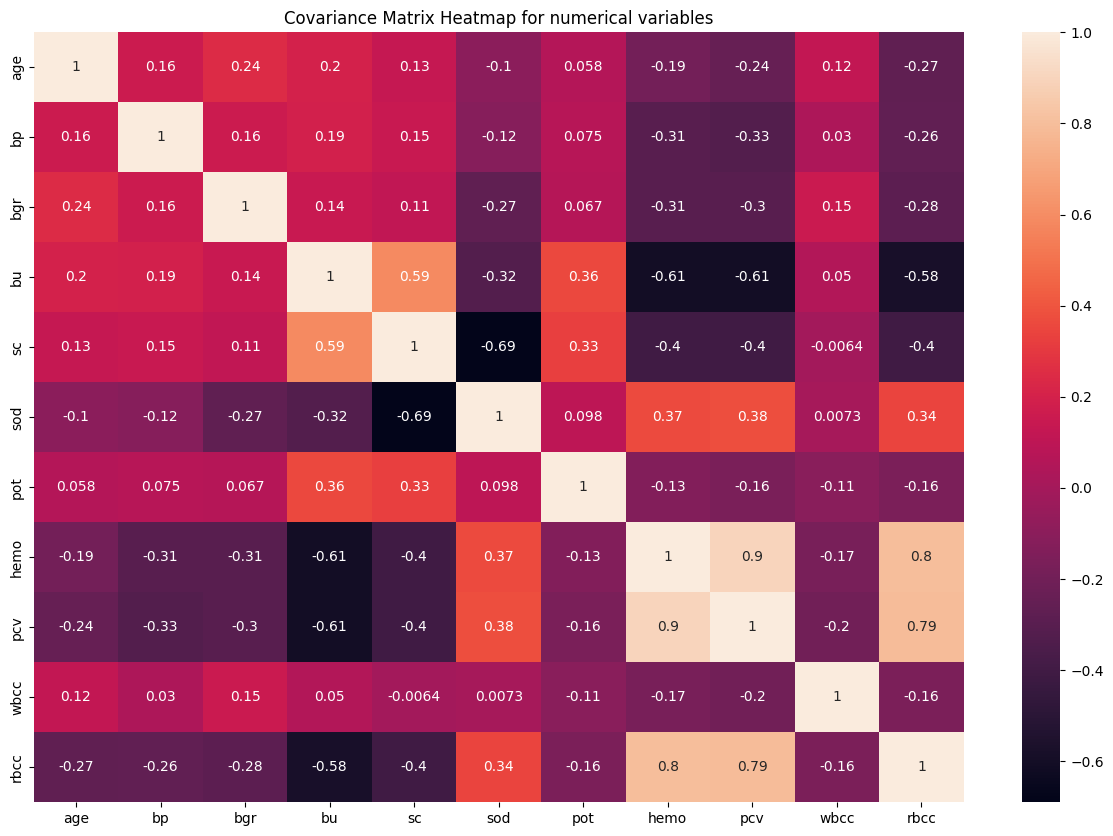

In [113]:
# prof says numerical variables shuold use heatmap, categorical variables should use use barplot.
#
#
#
#
#numerical variables:
float64=X1.select_dtypes(include=['float64'])
plt.figure(figsize=(15, 10))
sns.heatmap(float64.corr(), 
        annot=True)
plt.title('Covariance Matrix Heatmap for numerical variables')
plt.show()



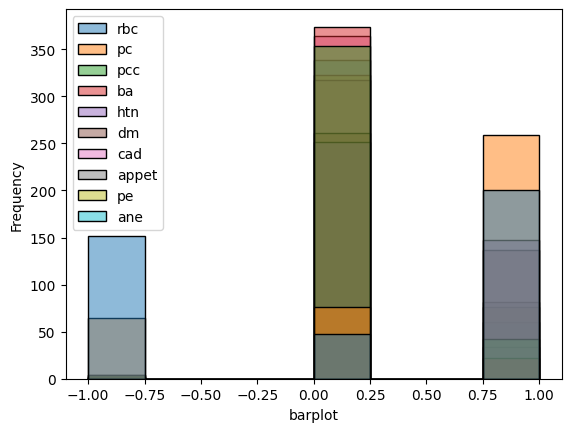

In [118]:
#categorical=X1.select_dtypes(include=['category','int8'])
#sns.histplot(
#    data=categorical, 
#    color='random', 
#    edgecolor='black',
#    binwidth=0.25
#    )
#plt.xlabel('barplot')
#plt.ylabel('Frequency')
#plt.show()


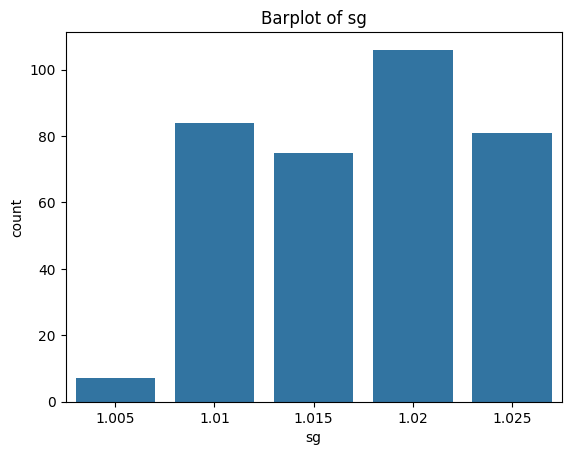

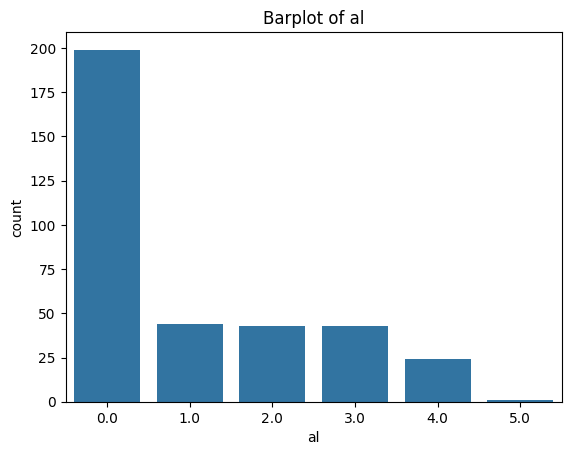

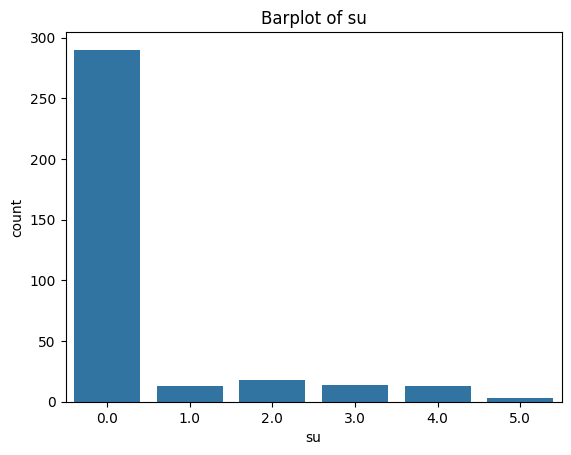

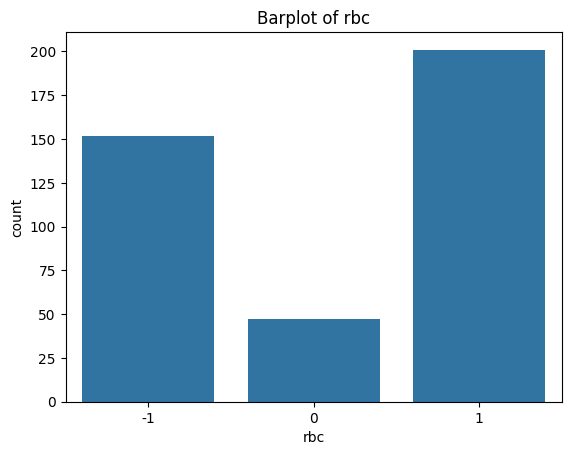

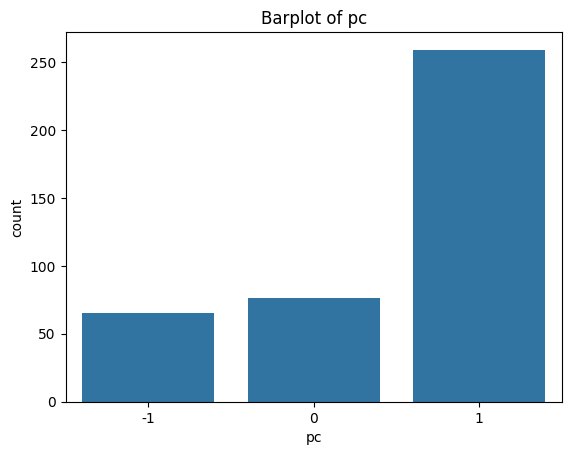

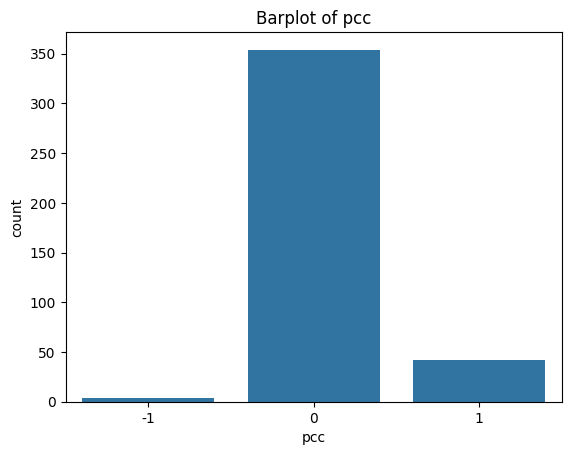

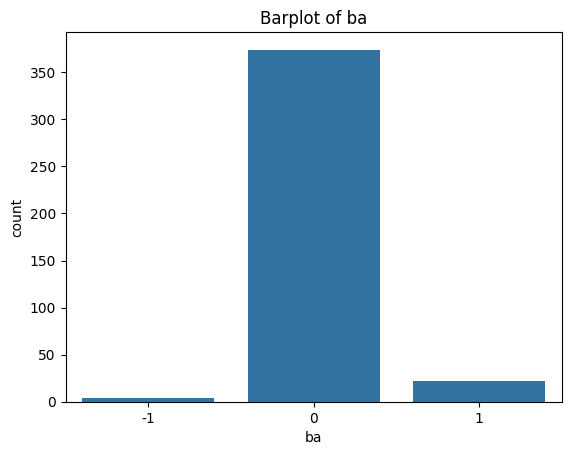

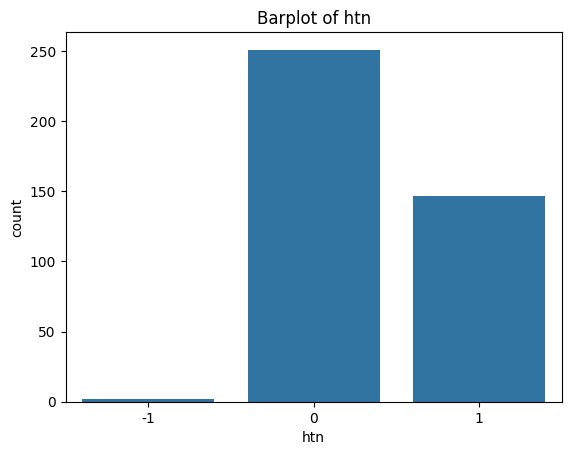

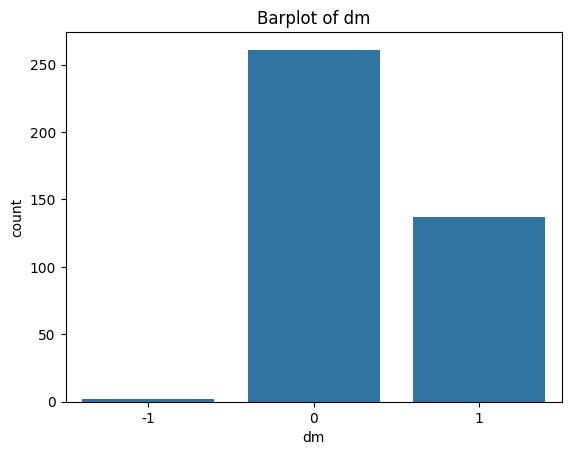

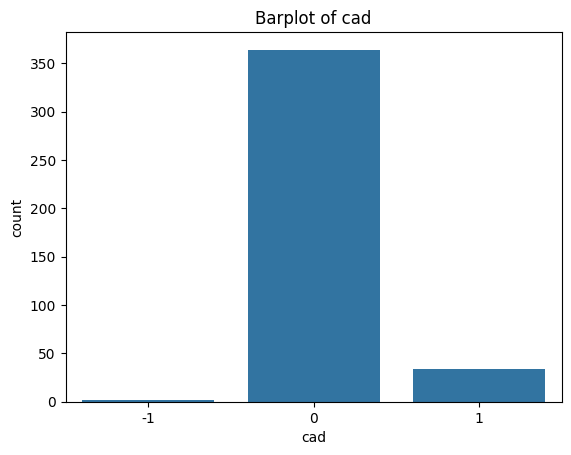

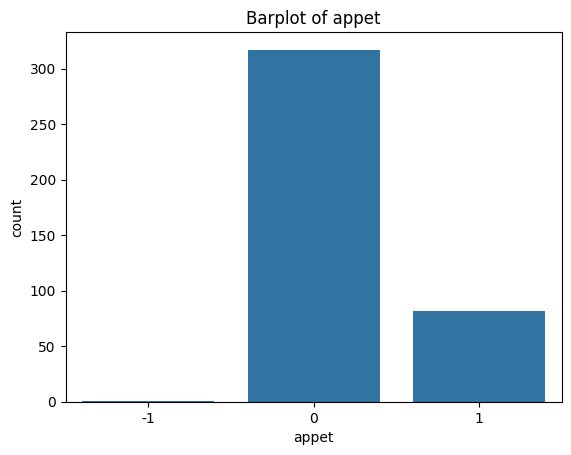

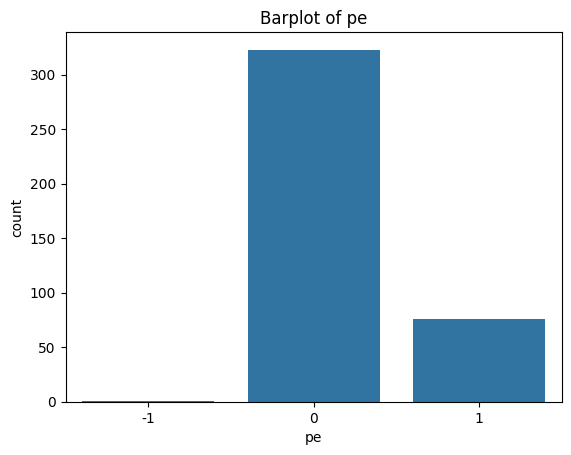

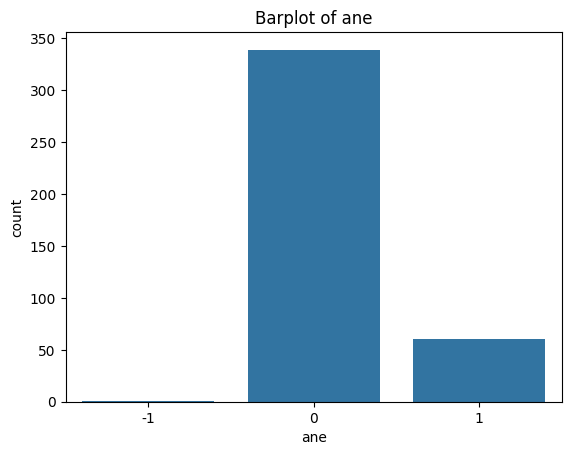

In [112]:
#categorical variables
categorical=X1.select_dtypes(include=['category','int8'])
for column in categorical.columns:
    plt.figure()
    sns.countplot(x=column, data=categorical)
    plt.title(f'Barplot of {column}')
    plt.show()

We use heatmap for numerical variables and barplot for categorical variables.

For heatmap:

1). This is a symmetric matrix and the elements on the diagonal are the variance. The diagonal of the correlation matrix is 1. 

2). The elements not on the diagonal are the covariance.

3). The smallest number in the matrix is -0.69 which means "sod" and "sc" are neagtively correlated.

4). The largest number in the matrix is 1 (the diagonal).

5). The largest number other than 1 is 0.9 which means "hemo" and "pcv" are positively correlated.

For barplots:

1). In those binary variables, the category “-1” could suggest missing data.

5. **Missing Value Analysis and Handling:** Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.

In [83]:
# prof says cannot drop all the missing values ,44包括44以上都要drop variables
# 不确定是   dropped numerical variable can replaced by mean 
# 还是       在没有被dropped掉的variables里的missing values 可以replaced by mean.
# When missing vlues is too large, lets say 90 missing vlues out of 100, then even though we use althorithm to work on them, we learn nothing from it.
X.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64

In [84]:
y.isnull().sum()

class    0
dtype: int64

In [85]:
#way2
float_na=X1[float_col].isna()
float_nasum=float_na.sum()
print(float_nasum)

cat_na=X1[columns_to_convert].isna()
cat_nasum=cat_na.sum()
print(cat_nasum)

binary_na = (X1[object_convert] == -1)
binary_nasum=binary_na.sum()
print(binary_nasum)

age       9
bp       12
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv      71
wbcc    106
rbcc    131
dtype: int64
sg    47
al    46
su    49
dtype: int64
rbc      152
pc        65
pcc        4
ba         4
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


Missing values: There are 9 missing values in "age", 12 missing values in "bp", 47 missing values in "sg", 46 missing values in "al", 49 missing values in "su", 152 missing values in "rbc", 65 missing values in "pc", 4 missing values in "pcc", 4 missing values in "ba", 44  missing values in "bgr", 19  missing values in "bu", 17  missing values in "sc", 87 missing values in "sod", 88 missing values in "pot", 52 missing values in "hemo", 71 missing values in "pcv", 106 missing values in "wbcc", 131 missing values in "rbcc", 2  missing values in "htn", 2  missing values in "dm", 2 missing values in "cad", 1 missing value in "appet", 1 missing value in "pe" and 1 missing value in "ane".

0 missing value in "class".

In [99]:
#the stragegy for addressing missing values
X1_drop= X1.dropna()

X1_drop


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
3,-0.203139,-0.473370,1.005,4.0,0.0,1,0,1,0,-0.392022,...,-0.456071,-0.766953,-0.580420,-0.788961,1,0,0,1,1,1
5,0.496661,0.990117,1.015,3.0,0.0,-1,-1,0,0,-0.935155,...,-0.112239,0.012867,-0.206202,-0.300401,1,1,0,0,1,0
9,0.088445,0.990117,1.020,2.0,0.0,0,0,1,0,-0.985679,...,-1.040585,-1.101161,1.256651,-0.984385,1,1,0,1,0,1
11,0.671612,-0.473370,1.010,3.0,0.0,0,0,1,0,2.929931,...,-0.593604,-0.766953,-1.328856,-0.886673,1,1,0,1,1,0
12,0.963195,-0.473370,1.015,3.0,1.0,-1,1,1,0,0.757399,...,-0.971819,-1.212564,1.290671,-1.277521,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.205078,0.258373,1.020,0.0,0.0,1,1,0,0,-0.101509,...,1.091172,0.904090,-0.580420,0.188159,0,0,0,0,0,0
396,-0.553039,-0.473370,1.025,0.0,0.0,1,1,0,0,-0.922524,...,1.366237,1.683910,-0.206202,1.458415,0,0,0,0,0,0
397,-2.302541,0.258373,1.020,0.0,0.0,1,1,0,0,-0.606749,...,1.125555,1.126896,-0.614440,0.676719,0,0,0,0,0,0
398,-2.010957,-1.205114,1.025,0.0,0.0,1,1,0,0,-0.429915,...,0.575424,1.349701,-0.410321,1.165279,0,0,0,0,0,0


The reason for not strategy for addressing them is : ???????????????????????????????????????

In some algorithms, the missing values can be seen as a seperate category. 
For instance, in decision tree, KNN, etc.

6. **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.

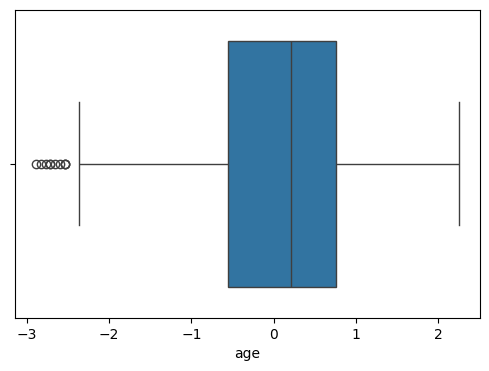

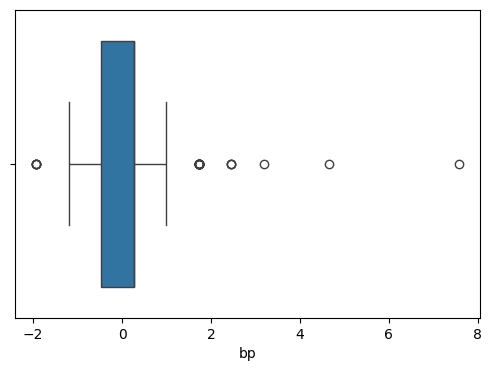

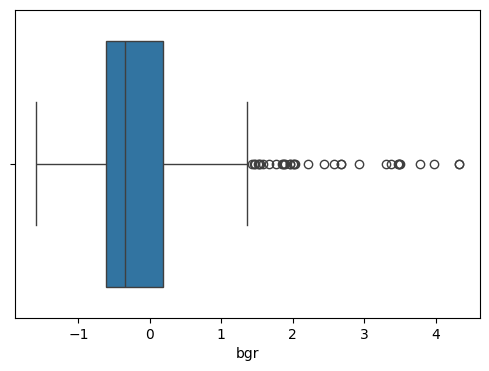

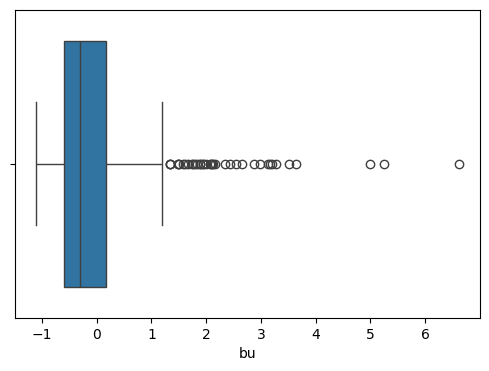

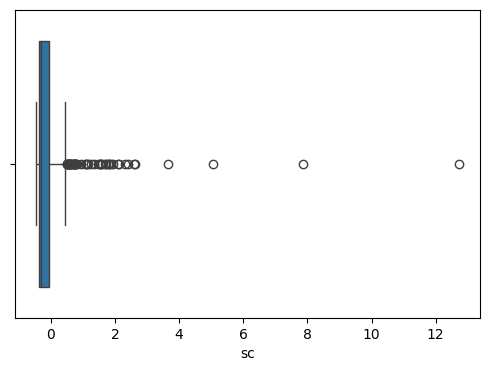

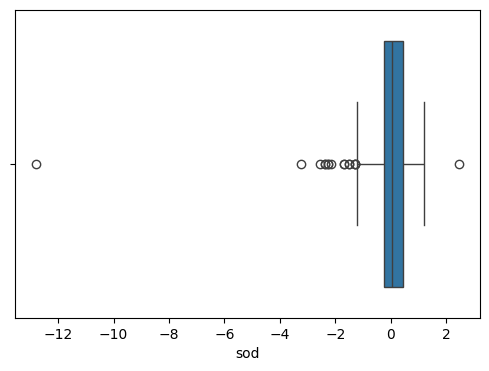

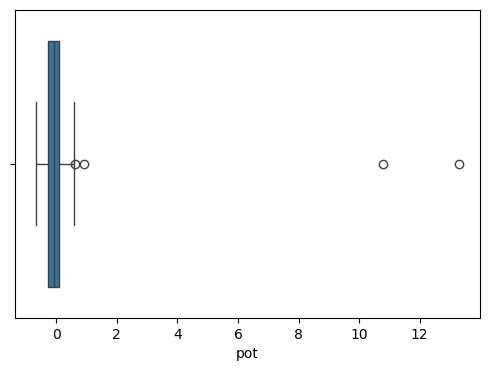

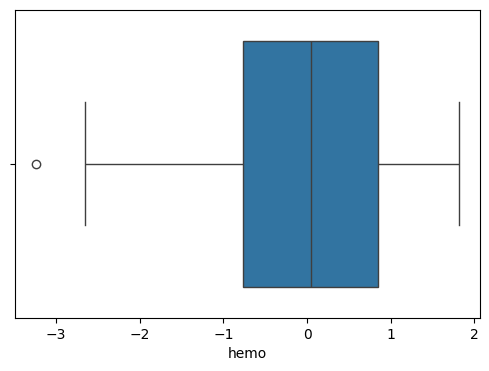

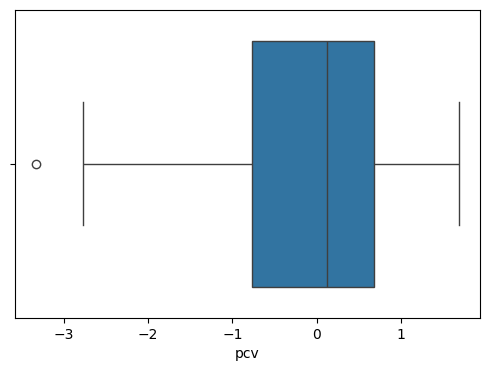

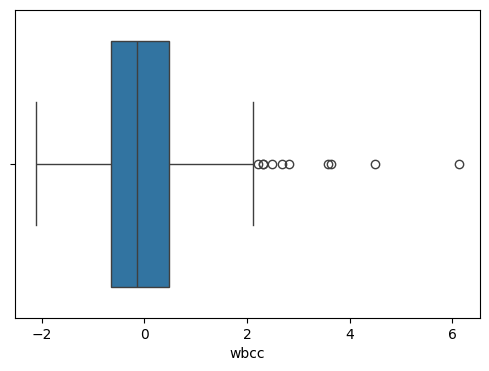

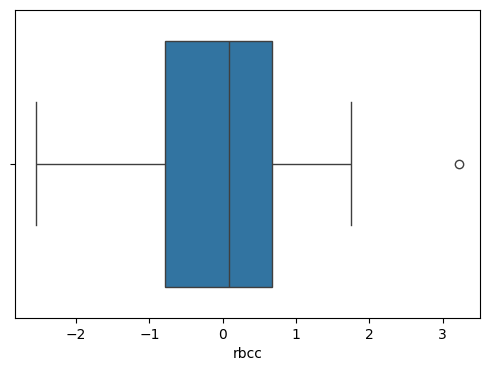

In [87]:
for col in float_col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=X1.select_dtypes(include=['float64'])[col])
    plt.xlabel(col)
    plt.show()

7. **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).

In [88]:
#prof says use K-means


8. **Data Splitting:** Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.


In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X1, y, test_size=0.7, random_state=0, stratify=y)

9. **Classifier Choices:** Identify the two classifiers you have chosen and justify your selections.

## Algorithm 1: Dicision tree

In [90]:
cs_dt = DecisionTreeClassifier(
    max_depth =30, 
    random_state=1
) 

In [91]:
cs_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, random_state=1)

[Text(0.6, 0.9, 'hemo <= 0.214\ngini = 0.469\nsamples = 120\nvalue = [75, 45]\nclass = notckd'),
 Text(0.4, 0.7, 'rbcc <= 0.921\ngini = 0.051\nsamples = 76\nvalue = [74, 2]\nclass = notckd'),
 Text(0.3, 0.5, 'sc <= -0.37\ngini = 0.026\nsamples = 75\nvalue = [74, 1]\nclass = notckd'),
 Text(0.2, 0.3, 'pot <= -0.259\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = notckd'),
 Text(0.1, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = notckd'),
 Text(0.3, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = ckd'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 69\nvalue = [69, 0]\nclass = notckd'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = ckd'),
 Text(0.8, 0.7, 'dm <= 0.5\ngini = 0.044\nsamples = 44\nvalue = [1, 43]\nclass = ckd'),
 Text(0.7, 0.5, 'gini = 0.0\nsamples = 43\nvalue = [0, 43]\nclass = ckd'),
 Text(0.9, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = notckd')]

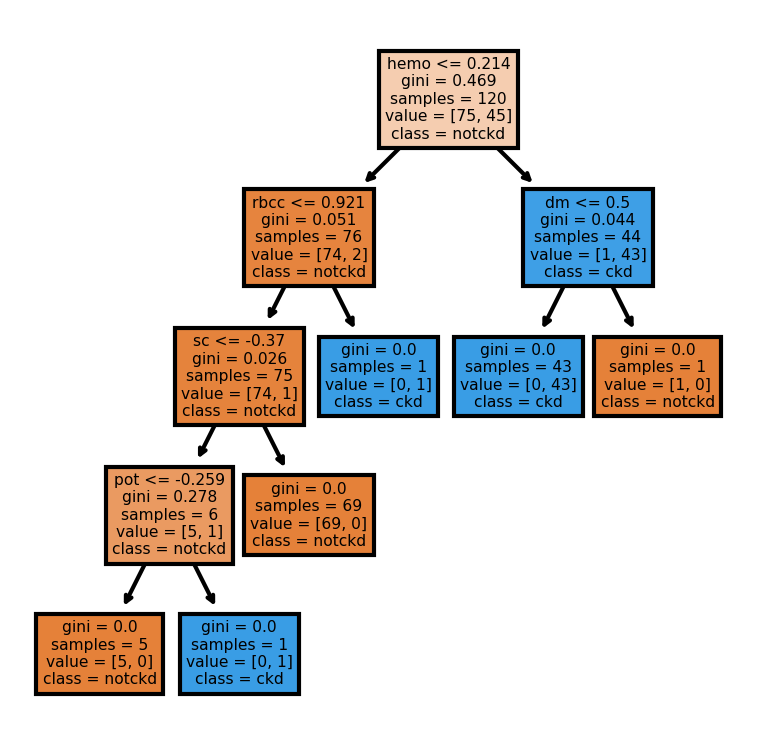

In [92]:
fig, axes = plt.subplots(
    nrows = 1,ncols = 1,figsize = (3,3), dpi=300
    )
plot_tree(
    cs_dt, 
    max_depth= 30, 
    feature_names = X_train.columns.tolist(), 
    class_names=['notckd', 'ckd'], 
    filled = True
    )



In [93]:
pred = cs_dt.predict(X_test)
pred[:5]

array(['notckd', 'notckd', 'ckd', 'ckd', 'ckd'], dtype=object)

In [94]:
cm = pd.DataFrame(confusion_matrix(y_test, pred), index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'
cm

Predicted,No,Yes
True,,
No,160,15
Yes,4,101


In [95]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ckd       0.98      0.91      0.94       175
      notckd       0.87      0.96      0.91       105

    accuracy                           0.93       280
   macro avg       0.92      0.94      0.93       280
weighted avg       0.94      0.93      0.93       280



## Algorithm 2: 

10. **Performance Metrics:** Outline the two metrics for comparing the performance of the classifiers.

11. **Feature Selection/Extraction:** Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).

12. **Classifier Comparison:** Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).

13. **Interpretable Classifier Insight:** After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).

14. **[Bonus]** Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).

15. **Team Contributions:** Document each team member's specific contributions related to the questions above.

16. **Link** to the public GitHub repository.

https://github.com/dail9/3da-assignment6/blob/main/assignment6.ipynb